### Project 2
This is a Machine Learning project to build a model that will identify if customers are eligible for loan or not.

**Importing Libraries**

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


**Read My File**

In [67]:
df = pd.read_csv("C:/Users/STUTERN/Downloads/loan_data_set.csv")

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Clenaing

In [69]:
#checking the shape of the dataset
df.shape

(614, 13)

In [70]:
#checking the columns if there are properly labelled
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [71]:
#Remaing some columns that are not properly named
df = df.rename(columns={'ApplicantIncome': 'Applicant_Income', 
                        'CoapplicantIncome': 'Co_Applicant_Income', 
                        'LoanAmount': 'Loan_Amount'})

In [72]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Co_Applicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [73]:
#creating a function to check the value counts of the columns

for i in df.columns:
    i = df.value_counts(i)
    print(f'\n\n\nvalues of {i}')




values of Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Length: 614, dtype: int64



values of Gender
Male      489
Female    112
dtype: int64



values of Married
Yes    398
No     213
dtype: int64



values of Dependents
0     345
1     102
2     101
3+     51
dtype: int64



values of Education
Graduate        480
Not Graduate    134
dtype: int64



values of Self_Employed
No     500
Yes     82
dtype: int64



values of Applicant_Income
2500     9
4583     6
6000     6
2600     6
5000     5
        ..
3250     1
3246     1
3244     1
3237     1
81000    1
Length: 505, dtype: int64



values of Co_Applicant_Income
0.0        273
2083.0       5
2500.0       5
1666.0       5
1750.0       3
          ... 
1911.0       1
1915.0       1
1929.0       1
1964.0       1
41667.0      1
Length: 287, dtype: int64



values of Loan_Amount
120.0    20
110.0    17
100.0    15
160.0

In [74]:
#checking for missing values in the columns
df.isnull().sum().sort_values(ascending=False)

Credit_History         50
Self_Employed          32
Loan_Amount            22
Dependents             15
Loan_Amount_Term       14
Gender                 13
Married                 3
Loan_ID                 0
Education               0
Applicant_Income        0
Co_Applicant_Income     0
Property_Area           0
Loan_Status             0
dtype: int64

In [75]:
#filling the missing values. Since all the columns with missing values are integer, I will fill them with their mode.

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [76]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Co_Applicant_Income    0
Loan_Amount            0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

In [77]:
#Checking for inconsistencies in the columns
(df == '?').any()

Loan_ID                False
Gender                 False
Married                False
Dependents             False
Education              False
Self_Employed          False
Applicant_Income       False
Co_Applicant_Income    False
Loan_Amount            False
Loan_Amount_Term       False
Credit_History         False
Property_Area          False
Loan_Status            False
dtype: bool

In [78]:
# checking if there are duplicate rows
df.duplicated().sum()

0

In [79]:
df.drop("Loan_ID", axis= 1, inplace = True) # Loan_ID is not necessary so I dropped it

**Observations**

This loan dataset has 614 rows and 13 columns. 3 columns were not properly named so I renamed them. We have so many missing values in 7 columns. So I filled them with their modes. There were no inconsistency in the dataset. The Target Variable is "Loan_Status" and it is a categorical column, so the model to use will be Supervised Classification Model

### EDA and Data Preprocessing 

In [80]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
#Make a copy of the dataset
df_copy =df.copy()

In [82]:
df.select_dtypes("number").columns

Index(['Applicant_Income', 'Co_Applicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [83]:
df.select_dtypes("object").columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

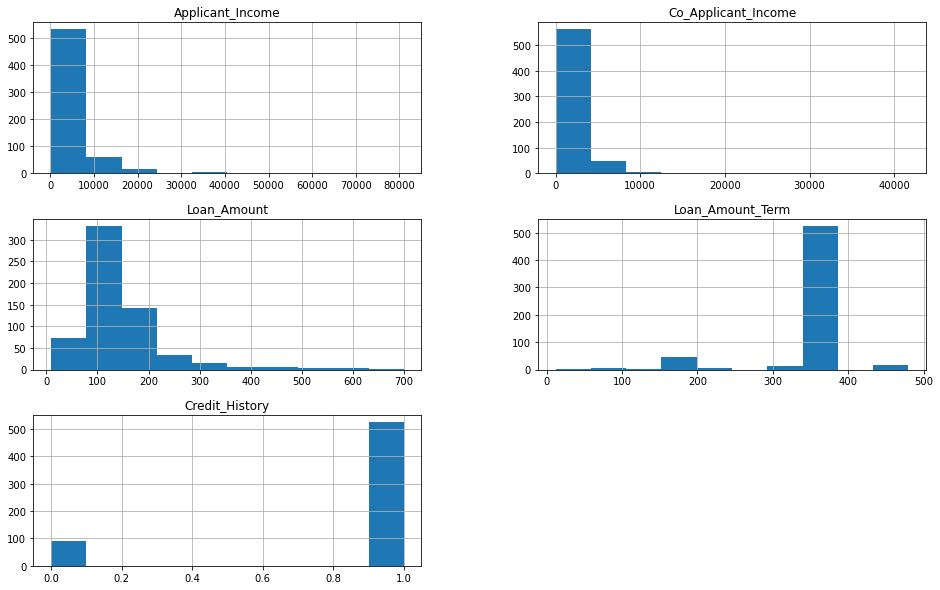

In [84]:
df.hist(figsize=[16,10]);

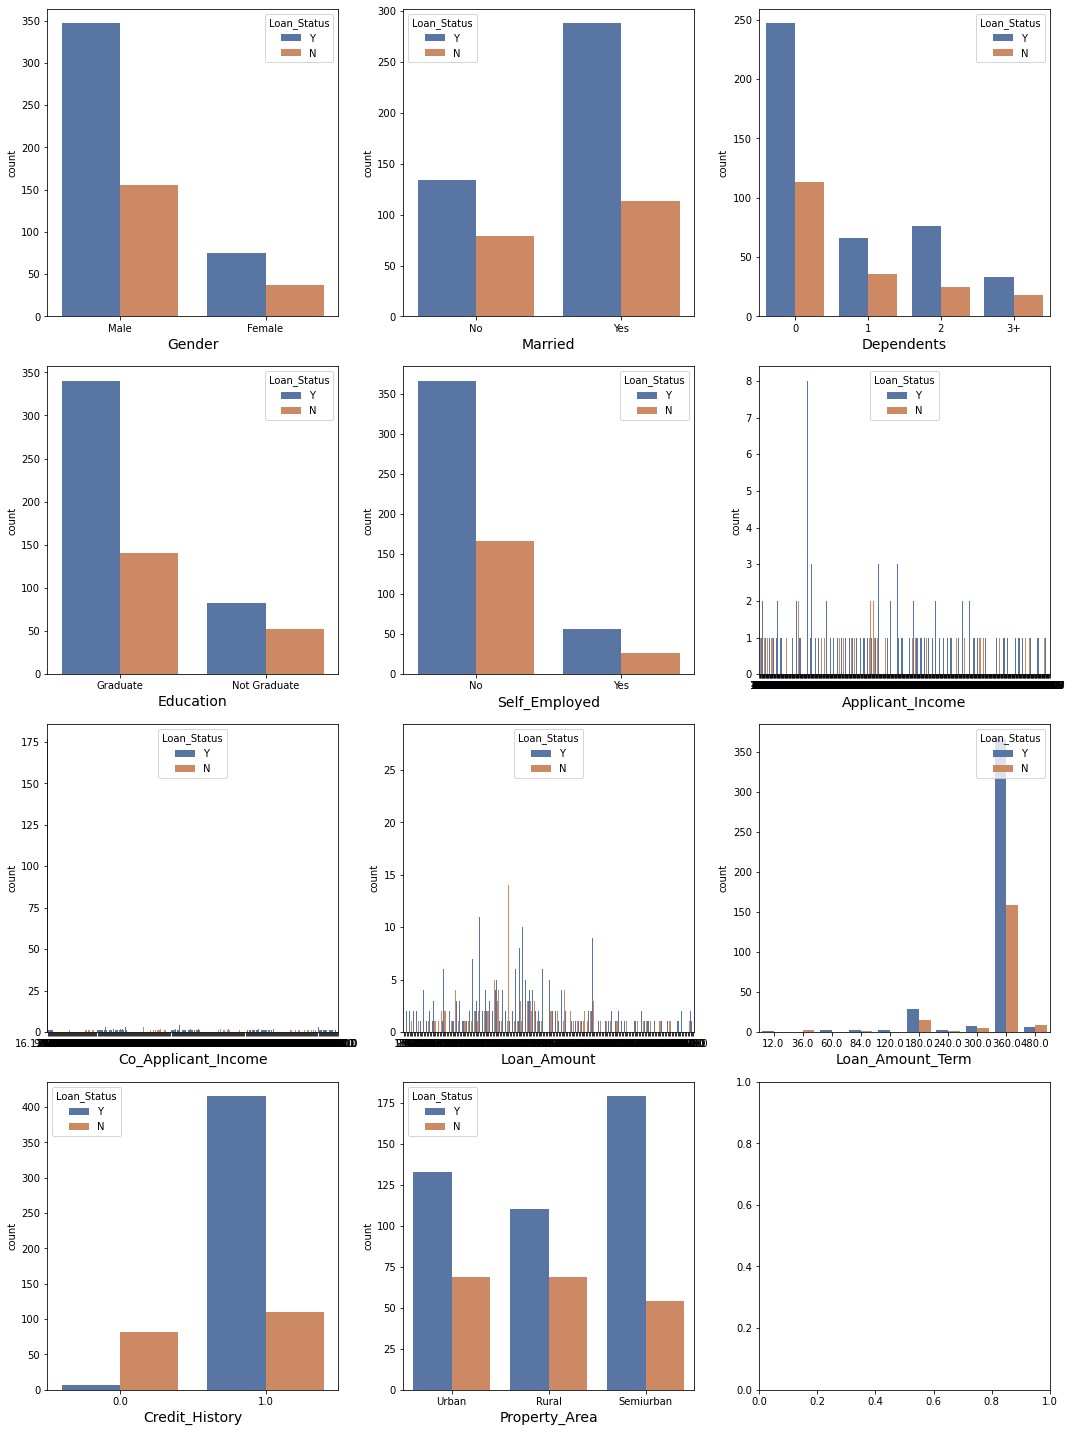

In [88]:
cat = df.columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
for i, ax in zip(cat[:-1], axes.flatten()):
    sns.countplot(x=i, hue='Loan_Status', data=df, palette='deep', ax=ax)
    ax.set_xlabel(i, fontsize=14)
plt.tight_layout()


**Transforming the Categorical Columns**

In [109]:
to_numeric = {'Male': 1, 'Female': 2,
              'Yes': 1, 'No': 2, 
              '0' : 0, '1' : 1, '2' : 2, '3+': 3,
              'Graduate': 1, 'Not Graduate': 2,
              'Urban': 3, 'Semiurban': 2,'Rural': 1,
              'Y': 1, 'N': 0,
              }
#to_numeric

In [110]:
df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [111]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [112]:
df.corr()


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.172914,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987
Married,0.364569,1.000000,-0.334216,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478
Dependents,-0.172914,-0.334216,1.000000,0.055752,-0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,0.055752,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.056798,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700
Applicant_Income,-0.058809,-0.051708,0.118202,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
Co_Applicant_Income,-0.082912,-0.075948,0.030430,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
Loan_Amount,-0.106404,-0.146212,0.163017,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,0.074030,0.100912,-0.103864,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.009170,-0.010938,-0.040160,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


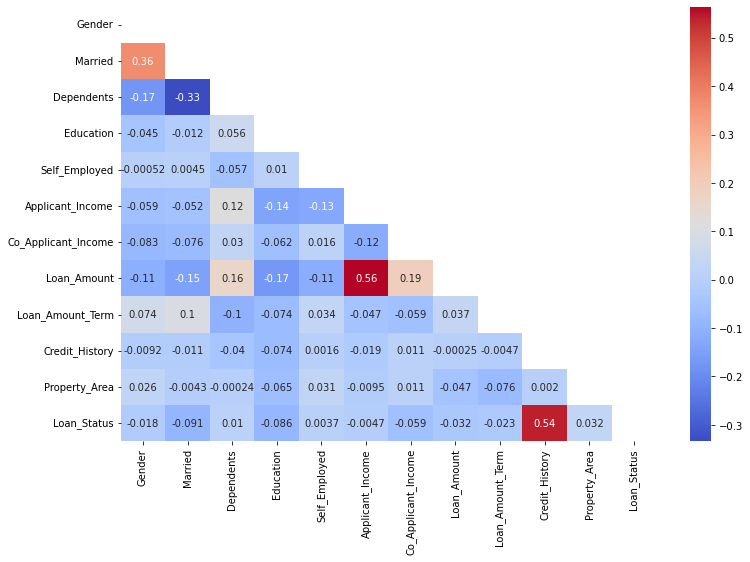

In [113]:
plt.figure(figsize=(12,8))
# using the upper triangle matrix as mask 
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), cmap ="coolwarm", annot=True, mask=matrix);

In [114]:
df1.corr()["Loan_Status"].sort_values(ascending = False).index

Index(['Loan_Status', 'Credit_History', 'Property_Area', 'Dependents',
       'Self_Employed', 'Applicant_Income', 'Gender', 'Loan_Amount_Term',
       'Loan_Amount', 'Co_Applicant_Income', 'Education', 'Married'],
      dtype='object')

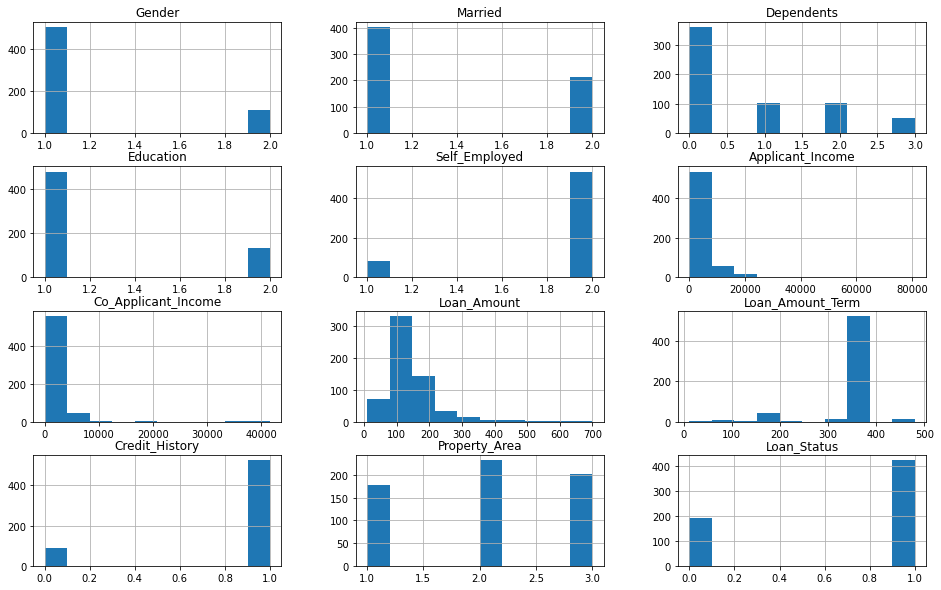

In [115]:
df.hist(figsize=[16,10]);

**Checking the columns skewness**

In [116]:
df.skew(axis = 0, skipna = True)

Gender                 1.648795
Married                0.644850
Dependents             1.015551
Education              1.367622
Self_Employed         -2.159796
Applicant_Income       6.539513
Co_Applicant_Income    7.491531
Loan_Amount            2.745407
Loan_Amount_Term      -2.402112
Credit_History        -2.021971
Property_Area         -0.066196
Loan_Status           -0.809998
dtype: float64

#### Observations
The dataset has numerical and categorical columns, so I transformed the categorical columns manually to numerical so i can draw proper insight from the data and it's skewness. The columns don't really have strong correlations, only the Credit_History has a strong correlation with Loan_Status. The columns doesn't have high skewness so there's no point to treat skewness.

**Dropping the target variable**

In [117]:
raw_df = df["Loan_Status"]
df1 = df.copy()
df.drop("Loan_Status" , axis = 1, inplace = True)

In [118]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3


In [119]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


**Import Libraries to build Model**

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline

**Splitting Data Into Training And Testing**

In [121]:
x_train, x_test, y_train, y_test = train_test_split(df, raw_df, test_size = .2)

In [122]:
x_train.shape

(491, 11)

In [123]:
x_test.shape

(123, 11)

**Using DecisionTreeClassifier**

In [136]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(x_train, y_train)

Model_predict_train = DT_Model.predict(x_train)
Model_predict_test = DT_Model.predict(x_test)

accuracy_score_train = accuracy_score(Model_predict_train, y_train)
accuracy_score_test = accuracy_score(Model_predict_test, y_test)
       
print (f"The model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

The model has an accuracy score  of 1.0 on training and 0.7073170731707317 on testing 


In [140]:
"""Checking for precision_score"""
# precision tp / (tp + fp)
precision = precision_score(y_test, Model_predict_test)
print('Precision Score is: %f' % precision)

"""checking for recall score"""
# recall: tp / (tp + fn)
recall = recall_score(y_test, Model_predict_test)
print('Recall score is: %f' % recall)

"""Checking for f1_score"""
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, Model_predict_test)
print('F1 score is: %f' % f1)

"""Checking for confusion_matrix"""
# confusion matrix
matrix = confusion_matrix(y_test, Model_predict_test)
print(matrix)

Precision Score is: 0.851351
Recall score is: 0.715909
F1 score is: 0.777778
[[24 11]
 [25 63]]


**Checking the Precision, F1 Score, and Recall, and confusion matrix of the Decision Tress Model**

Precision Score: the precision score is 0.851351, which means that 85.14% of the predicted positive (class 1) observations are actually positive.

Recall Score: the recall score is 0.715909, which means that 71.59% of the actual positive (class 1) observations are correctly identified by the model.

F1 Score: the F1 score is 0.777778, which is a measure of the overall performance of the model.

Confusion Matrix: the confusion matrix shows that there are 24 true negatives (predicted as 0 and actually 0), 11 false positives (predicted as 1 but actually 0), 25 false negatives (predicted as 0 but actually 1), and 63 true positives (predicted as 1 and actually 1).

In [142]:
#Decision_Tree_Result = pd.DataFrame({'y_test':y_test,'prediction':y_predict})
#Decision_Tree_Result.to_csv("Decision_Tree_Result.csv")

**Using RandomForestClassifier**

In [143]:
RF_Model = RandomForestClassifier()
RF_Model.fit(x_train, y_train)

Model_predict_train = RF_Model.predict(x_train)
Model_predict_test = RF_Model.predict(x_test)

accuracy_score_train = accuracy_score(Model_predict_train, y_train)
accuracy_score_test = accuracy_score(Model_predict_test, y_test)
       
print (f"The model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

The model has an accuracy score  of 1.0 on training and 0.7886178861788617 on testing 


In [144]:
"""Checking for precision_score"""
# precision tp / (tp + fp)
precision = precision_score(y_test, Model_predict_test)
print('Precision Score is: %f' % precision)

"""checking for recall score"""
# recall: tp / (tp + fn)
recall = recall_score(y_test, Model_predict_test)
print('Recall score is: %f' % recall)

"""Checking for f1_score"""
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, Model_predict_test)
print('F1 score is: %f' % f1)

"""Checking for confusion_matrix"""
# confusion matrix
matrix = confusion_matrix(y_test, Model_predict_test)
print(matrix)

Precision Score is: 0.836957
Recall score is: 0.875000
F1 score is: 0.855556
[[20 15]
 [11 77]]


**Checking the Precision, F1 Score, and Recall, and confusion matrix of the Random Forest Model**

Precision Score: the precision score is 0.836957, which means that 83.70% of the predicted positive (class 1) observations are actually positive.

Recall Score: the recall score is 0.875000, which means that 87.50% of the actual positive (class 1) observations are correctly identified by the model.

F1 Score: the F1 score is 0.855556, which is a measure of the overall performance of the model.

Confusion Matrix: the confusion matrix shows that there are 20 true negatives (predicted as 0 and actually 0), 15 false positives (predicted as 1 but actually 0), 11 false negatives (predicted as 0 but actually 1), and 77 true positives (predicted as 1 and actually 1).

In [146]:
#Random_Forest_Result = pd.DataFrame({'y_test':y_test,'prediction':y_predict})
#Random_Forest_Result.to_csv("Random_Forest_Result.csv")

**Using LogisticRegression**

In [152]:
LG_Model = LogisticRegression()
LG_Model.fit(x_train, y_train)

Model_predict_train = LG_Model.predict(x_train)
Model_predict_test = LG_Model.predict(x_test)

accuracy_score_train = accuracy_score(Model_predict_train, y_train)
accuracy_score_test = accuracy_score(Model_predict_test, y_test)
       
print (f"The model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ");

The model has an accuracy score  of 0.8004073319755601 on training and 0.8373983739837398 on testing 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
"""Checking for precision_score"""
# precision tp / (tp + fp)
precision = precision_score(y_test, Model_predict_test)
print('Precision Score is: %f' % precision)

"""checking for recall score"""
# recall: tp / (tp + fn)
recall = recall_score(y_test, Model_predict_test)
print('Recall score is: %f' % recall)

"""Checking for f1_score"""
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, Model_predict_test)
print('F1 score is: %f' % f1)

"""Checking for confusion_matrix"""
# confusion matrix
matrix = confusion_matrix(y_test, Model_predict_test)
print(matrix)

Precision Score is: 0.840000
Recall score is: 0.954545
F1 score is: 0.893617
[[19 16]
 [ 4 84]]


**Checking the Precision, F1 Score, and Recall, and confusion matrix of the Logistic Regression Model**

Precision Score: the precision score is 0.840000, which means that 84% of the predicted positive (class 1) observations are actually positive.

Recall Score: the recall score is 0.954545, which means that 95.45% of the actual positive (class 1) observations are correctly identified by the model.

F1 Score: the F1 score is 0.893617, which is a measure of the overall performance of the model.

Confusion Matrix: the confusion matrix shows that there are 19 true negatives (predicted as 0 and actually 0), 16 false positives (predicted as 1 but actually 0), 4 false negatives (predicted as 0 but actually 1), and 84 true positives (predicted as 1 and actually 1).

In [156]:
#Logistic_Regression_Result = pd.DataFrame({'y_test':y_test,'prediction':y_predict})
#Logistic_Regression_Result.to_csv("Logistic_Regression_Result.csv")

**Checking the Classification Report**

In [159]:
print(classification_report(y_test, Model_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.54      0.66        35
           1       0.84      0.95      0.89        88

    accuracy                           0.84       123
   macro avg       0.83      0.75      0.77       123
weighted avg       0.84      0.84      0.83       123



Using the Classification Report to summarize the overal performance of a model. This report is based on several performance metrics that are computed for each class (0 and 1).

**Precision Score**: For class 0, the precision score is 0.83, which means that 83% of the predicted positive (class 1) observations are actually positive. For class 1, the precision score is 0.84, which means that 84% of the predicted positive (class 1) observations are actually positive.

**Recall Score**: For class 0, the recall score is 0.54, which means that 54% of the actual positive (class 0) observations are correctly identified by the model. For class 1, the recall score is 0.95, which means that 95% of the actual positive (class 1) observations are correctly identified by the model.

**F1 Score**: It provides a balance between precision and recall. For class 0, the F1 score is 0.66. For class 1, the F1 score is 0.89.

**Support**: It is the number of observations in each class.

**Accuracy**: the accuracy is 0.84, which means that 84% of the observations are correctly predicted by the model.

**Macro Average**: the macro average precision, recall, and F1 score are 0.83, 0.75, and 0.77, respectively.

**Weighted Average**: the weighted average precision, recall, and F1 score are 0.84, 0.84, and 0.83, respectively.

#### Conclusion

After training and testing the dataset on 3 different Models (DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression). I found out that LogisticRegression has the best accuracy 80% on training and 83% on testing. 

Overall, the model appears to have a higher performance for class 1 than class 0. The precision and recall scores for class 1 are high, indicating that the model performs well in identifying positive samples for class 1. However, the model performs very well in identifying positive samples for class 0. The F1-score, which is a harmonic mean of precision and recall, is higher for class 1, indicating that the model performs better overall for class 1. The weighted average for precision, recall and f1-score indicates that the model has higher precision than recall and the overall performance is moderate.

That's why I choose the Logistic Regression Model for this project.